In [252]:
import cv2 as cv
import numpy as np
from PIL import Image
from pillow_heif import register_heif_opener
import os

import matplotlib.pyplot as plt

register_heif_opener()

root_path = "../"

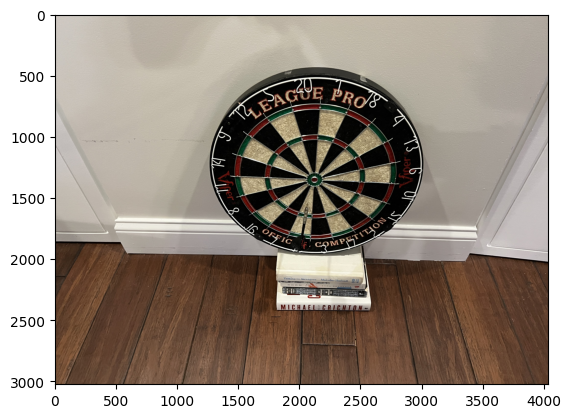

In [253]:
empty_board_path = f"{root_path}data/heic/IMG_8551.HEIC"

image = Image.open(empty_board_path)

plt.imshow(image)
plt.show()

In [254]:
image = cv.resize(np.array(image), (0, 0), fx=0.50, fy=0.50)

# # Crop image width to 800
# image = image[:, :800]

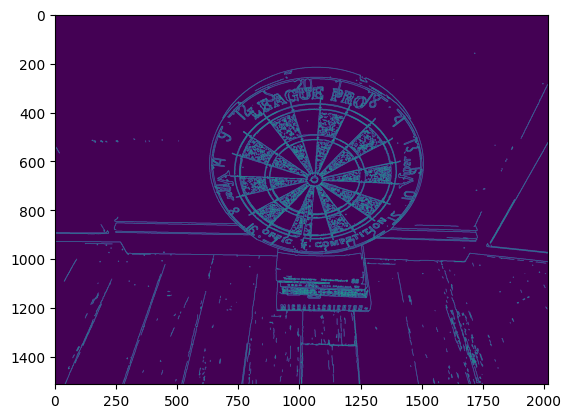

In [255]:
# Preform canny edge detection on image
edges = cv.Canny(np.array(image), 150, 250)

# Resize image down to 1/4 of original size


plt.imshow(edges)
plt.show()

In [256]:
# preform hough circle detection
circles = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=450, maxRadius=600)

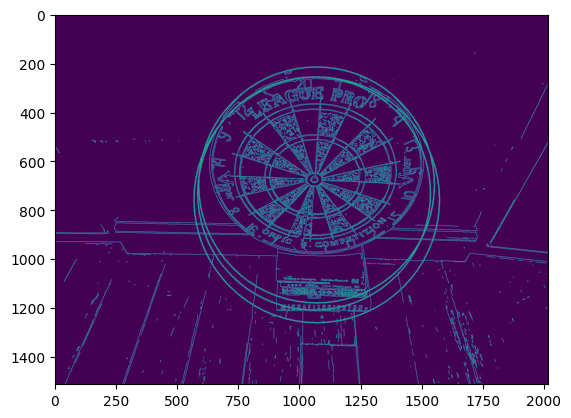

In [257]:
# draw circles on image
edges_visual = edges.copy()

for circle in circles[0][:3]:
    cv.circle(edges_visual, (int(circle[0]), int(circle[1])), int(circle[2]), (150, 255, 150), 4)
    # draw the center of the circle
    cv.circle(edges_visual,(int(circle[0]), int(circle[1])),2,(0,0,255),3)

plt.imshow(edges_visual)
plt.show()

In [258]:
# get average circle radius and center of top 5 circles
avg_radius = np.mean(circles[0][:3, 2])
avg_center = np.mean(circles[0][:3, :2], axis=0)

print(f"Average radius: {avg_radius}")
print(f"Average center: {avg_center}")


Average radius: 487.1666564941406
Average center: [1066.5  730.5]


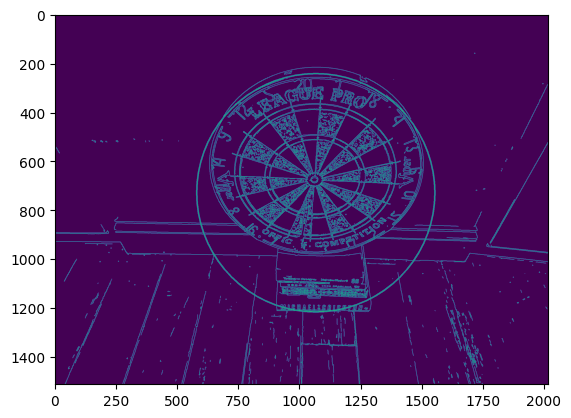

In [259]:
# draw circles on image
edges_visual = edges.copy()

cv.circle(edges_visual, (int(avg_center[0]), int(avg_center[1])), int(avg_radius), (150, 255, 150), 4)
# draw the center of the circle
cv.circle(edges_visual,(int(avg_center[0]), int(avg_center[1])),2,(0,0,255),3)

plt.imshow(edges_visual)
plt.show()

549 1568


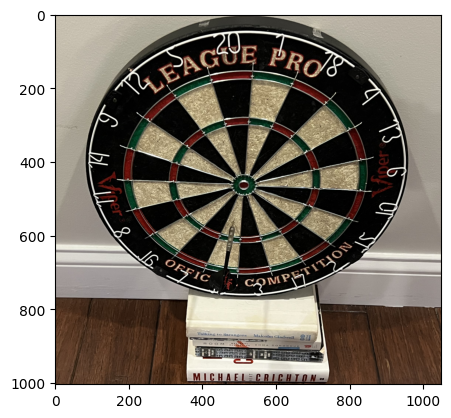

In [260]:
buffer_x = 30
buffer_y = 30


# Crop image to largest circle
x = int(avg_center[0] - avg_radius) - buffer_x
y = int(avg_center[1] - avg_radius) - buffer_y
w = int(avg_radius * 2) + buffer_x + 15
h = int(avg_radius * 2) + buffer_y


print(x,x+w)

cropped_image = image[y:y+h, x:x+w+30].copy()

plt.imshow(cropped_image)
plt.show()

In [261]:
#Downsample image to 800x800
cropped_image = cv.resize(cropped_image, (800, 800),interpolation = cv.INTER_AREA)

cropped_image.shape

(800, 800, 3)

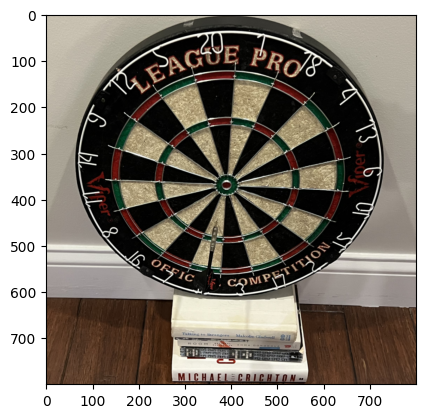

In [262]:
# check if data cropped directory exists
if not os.path.exists(f"{root_path}data/cropped"):
    os.makedirs(f"{root_path}data/cropped")

color_img = cv.cvtColor(cropped_image, cv.COLOR_RGB2BGR)   

# Save cropped image
cv.imwrite(f"{root_path}data/cropped/cropped_image.jpg", color_img)

# display image
plt.imshow(cropped_image)
plt.show()